<a href="https://colab.research.google.com/github/psalinas505/python-diabetes/blob/CleanUP/Python_Diabetes_PS_NN_BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Popup Window Menu Code


In [3]:
'''
Assigned to: BB
BB I don't know if this is the right place for this section, but you did mention the top during our brainstorming session 

'''

"\nAssigned to: BB\nBB I don't know if this is the right place for this section, but you did mention the top during our brainstorming session \n\n"

# ITExperience Final ML Python Project


## Project Description


**Python Final Project**

Teammates: Pablo Salinas, Nathalie Nieto, and Brittany Brittany


My Python Project is on Diabetes. 

The dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. 

Content:
The datasets consists of several medical predictor variables and one target variable; the Outcome. 

Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, etc.

Variables:
Pregnancies,
Glucose,
BloodPressure,
SkinThickness,
Insulin,
BMI,
DiabetesPedigreeFunction,
Age,
and Outcome


**References:**

Towards Data Science: ML Workflow
https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8


Towards Data Science: Prima Indian Diabetes Prediction
https://towardsdatascience.com/pima-indian-diabetes-prediction-7573698bd5fe


BMC Medical Informatics and Decision Making
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-0918-5


Kaggle: Prima Indians Diabetes Database
https://www.kaggle.com/uciml/pima-indians-diabetes-database


GitHub: ML with Python
https://github.com/LahiruTjay/Machine-Learning-With-Python/blob/master/datasets/diabetes.csv


Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records
https://www.hindawi.com/journals/bmri/2014/781670/

Diabetes2 Dataset
https://archive.ics.uci.edu/ml/machine-learning-databases/00296/



## Libraries

In [4]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import figure from matplotlib
from matplotlib.pyplot import figure

# Import libraries for Model Selection
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


##  Datasets

### Prima Indian Diabetes Prediction

In [5]:
# Import the dataset

diabetes = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetes.csv')

# Examine the dataset 
diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# Display description
'''
From NN
'''

print(diabetes.describe())


       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]


In [7]:
# Examine an element of the dataset
print(diabetes.iloc[5])


Pregnancies                   5.000
Glucose                     116.000
BloodPressure                74.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          25.600
DiabetesPedigreeFunction      0.201
Age                          30.000
Outcome                       0.000
Name: 5, dtype: float64


In [8]:
# Determine the percentage of positive cases for diabetes in dataset
'''
From NN
'''

diab_pos = diabetes[diabetes['Outcome']==1]
diab_neg = diabetes[diabetes['Outcome']==0]

outlier_frac = len(diab_pos) / len(diab_neg)
print(outlier_frac)

print(f'Positive prima cases : {len(diab_pos)}')
print(f'Negative diabetes cases : {len(diab_neg)}')


0.536
Positive prima cases : 268
Negative diabetes cases : 500


**53% representation of diabetes positive cases**


### UCI Machine Learning Repository Dataset

In [9]:
# Import new dataset (UCI)

diabetes2 = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/diabetic_data.csv')

# Examine the dataset 
diabetes2


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO


In [10]:
# Display description
'''
From NN
'''

print(diabetes2.describe())


       encounter_id   patient_nbr  ...  number_inpatient  number_diagnoses
count  1.017660e+05  1.017660e+05  ...     101766.000000     101766.000000
mean   1.652016e+08  5.433040e+07  ...          0.635566          7.422607
std    1.026403e+08  3.869636e+07  ...          1.262863          1.933600
min    1.252200e+04  1.350000e+02  ...          0.000000          1.000000
25%    8.496119e+07  2.341322e+07  ...          0.000000          6.000000
50%    1.523890e+08  4.550514e+07  ...          0.000000          8.000000
75%    2.302709e+08  8.754595e+07  ...          1.000000          9.000000
max    4.438672e+08  1.895026e+08  ...         21.000000         16.000000

[8 rows x 13 columns]


In [11]:
# Examine an element of the dataset
print(diabetes2.iloc[5])


encounter_id                    35754
patient_nbr                  82637451
race                        Caucasian
gender                           Male
age                           [50-60)
weight                              ?
admission_type_id                   2
discharge_disposition_id            1
admission_source_id                 2
time_in_hospital                    3
payer_code                          ?
medical_specialty                   ?
num_lab_procedures                 31
num_procedures                      6
num_medications                    16
number_outpatient                   0
number_emergency                    0
number_inpatient                    0
diag_1                            414
diag_2                            411
diag_3                            250
number_diagnoses                    9
max_glu_serum                    None
A1Cresult                        None
metformin                          No
repaglinide                        No
nateglinide 

In [12]:
# Import UCI ID Mapping dataset

diabetes2_mapping = pd.read_csv('https://raw.githubusercontent.com/psalinas505/python-diabetes/main/IDs_mapping.csv')

# Examine the dataset 
diabetes2_mapping


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
...,...,...
62,22,Transfer from hospital inpt/same fac reslt in...
63,23,Born inside this hospital
64,24,Born outside this hospital
65,25,Transfer from Ambulatory Surgery Center


## Visualizations

### Diabetes Dataset Visualizations

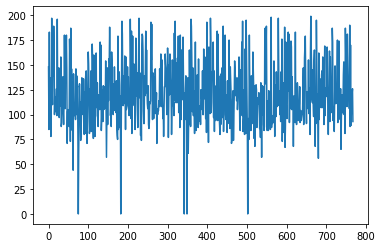

In [13]:
# Simple plots to examine data
plt.plot(diabetes['Glucose']);


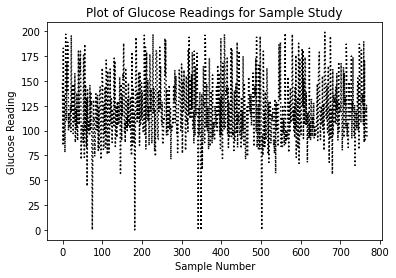

In [14]:
# Adding labels
plt.plot(diabetes['Glucose'], ':k')
plt.xlabel('Sample Number')
plt.ylabel('Glucose Reading')
plt.title('Plot of Glucose Readings for Sample Study');


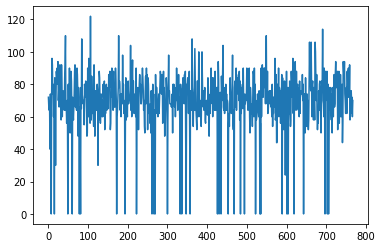

In [15]:
plt.plot(diabetes['BloodPressure']);


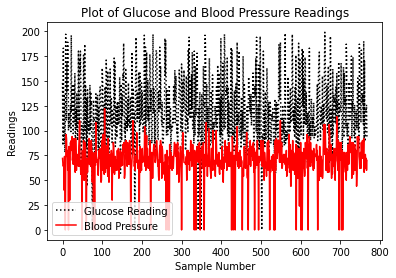

In [16]:
# Adding more than one plot with legend
plt.plot(diabetes['Glucose'], ':k', label='Glucose Reading')
plt.plot(diabetes['BloodPressure'], '-r', label='Blood Pressure')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and Blood Pressure Readings')
plt.legend();


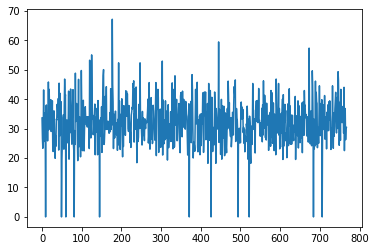

In [17]:
plt.plot(diabetes['BMI']);


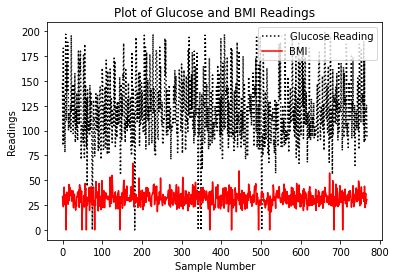

In [18]:
# Adding more than one plot with legend
plt.plot(diabetes['Glucose'], ':k', label='Glucose Reading')
plt.plot(diabetes['BMI'], '-r', label='BMI')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and BMI Readings')
plt.legend();


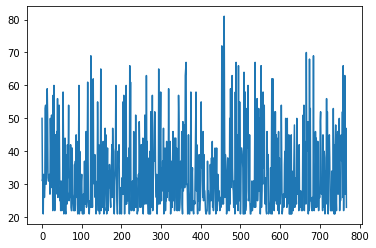

In [19]:
plt.plot(diabetes['Age']);


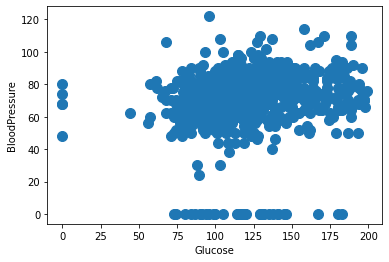

In [20]:
# Scatter plot 

plt.scatter(diabetes['Glucose'], diabetes['BloodPressure'], s=100)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure');


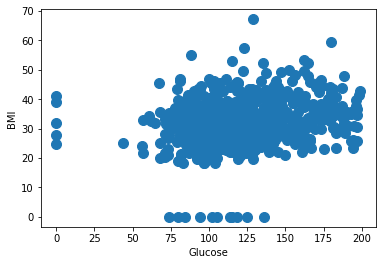

In [21]:
# Scatter plot 

plt.scatter(diabetes['Glucose'], diabetes['BMI'], s=100)
plt.xlabel('Glucose')
plt.ylabel('BMI');


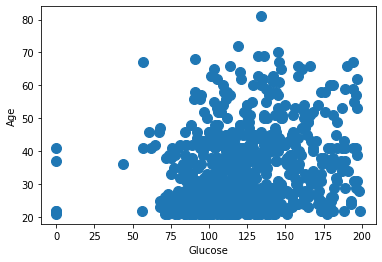

In [22]:
# Scatter plot 

plt.scatter(diabetes['Glucose'], diabetes['Age'], s=100)
plt.xlabel('Glucose')
plt.ylabel('Age');


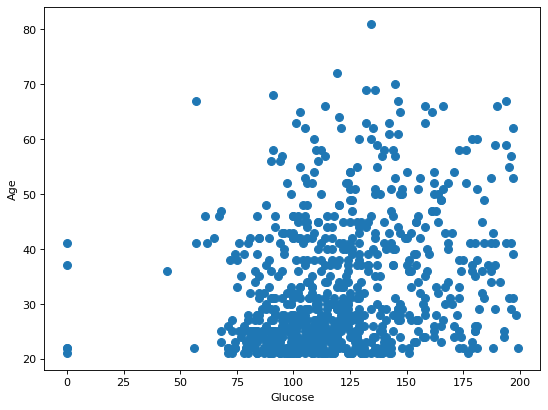

In [23]:
# Changing the size of a plot 
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(diabetes['Glucose'], diabetes['Age'], s=50)
plt.xlabel('Glucose')
plt.ylabel('Age');


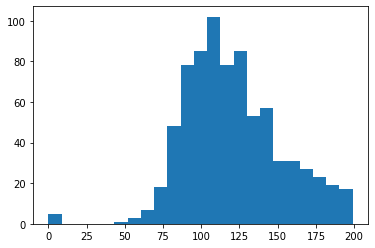

In [24]:
# Plotting histogram 

plt.hist(diabetes['Glucose'], bins='auto')
plt.show()


(23, 24)

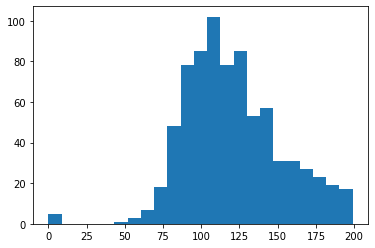

In [25]:
# Bar plots

# We would use the plt.hist() to make bar plots 

n, bins, _ = plt.hist(diabetes['Glucose'], bins='auto')

n.size, bins.size


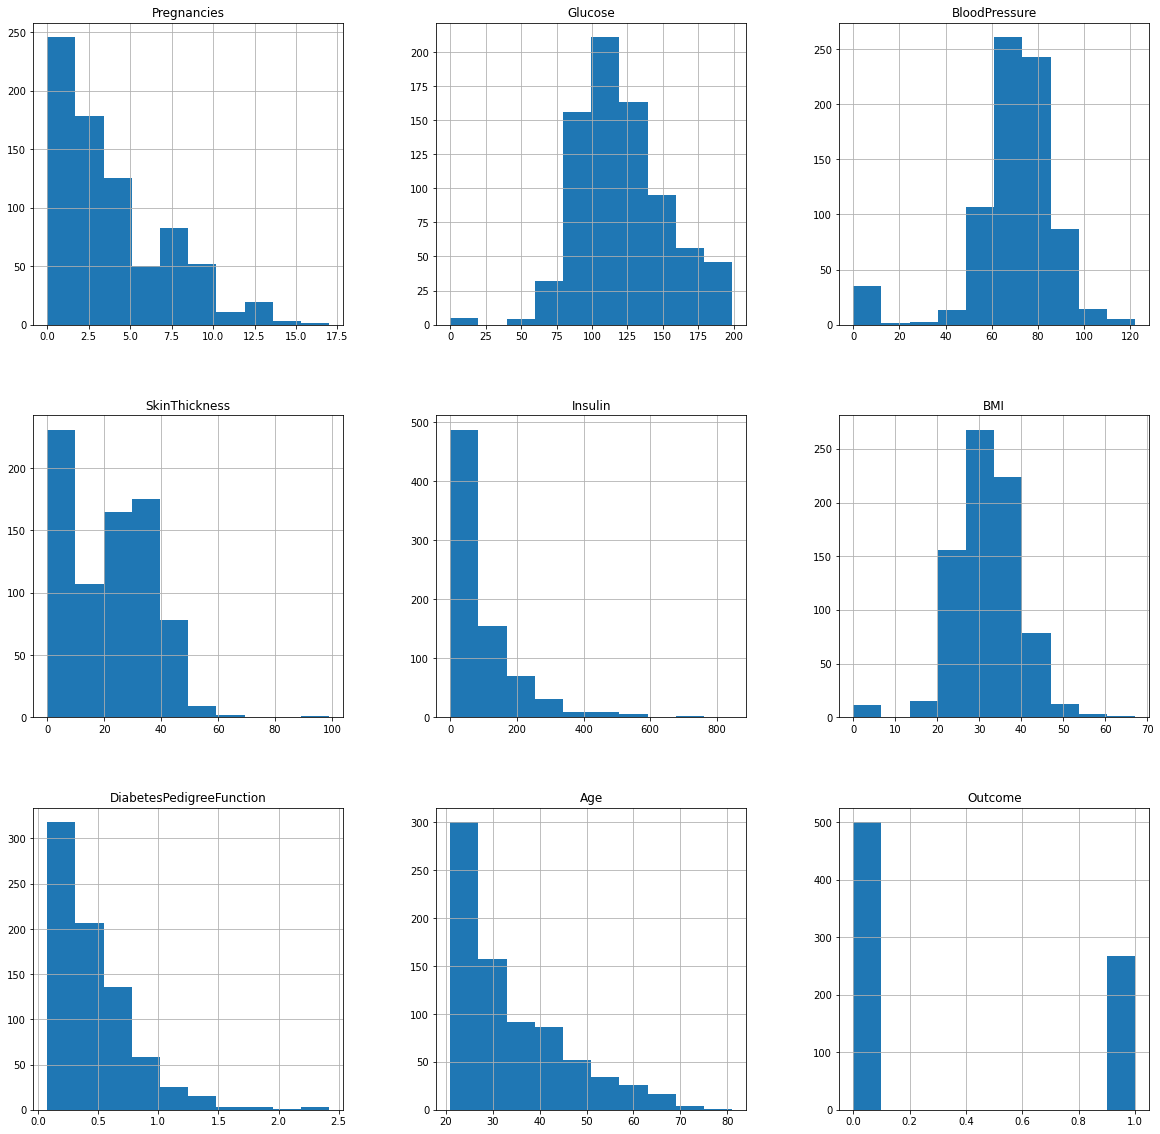

In [26]:
# Plot histogram of features
'''
From NN
'''

diabetes.hist(figsize= (20,20))
plt.show()


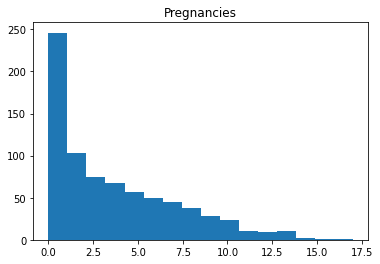

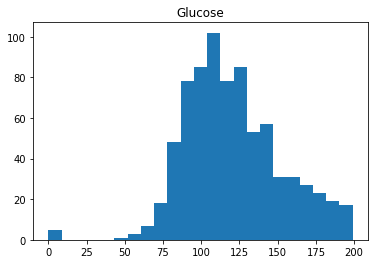

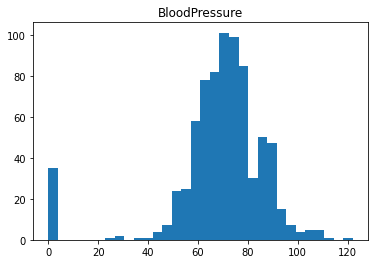

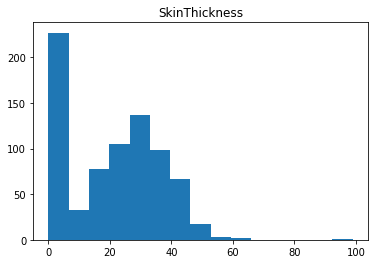

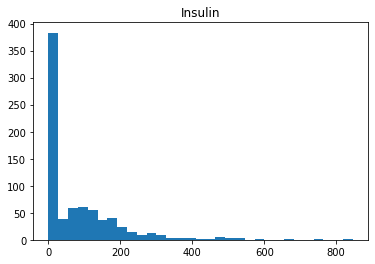

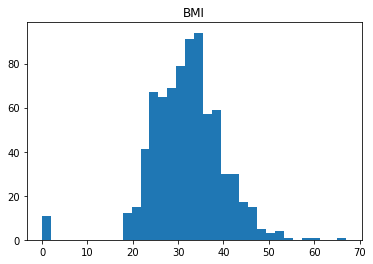

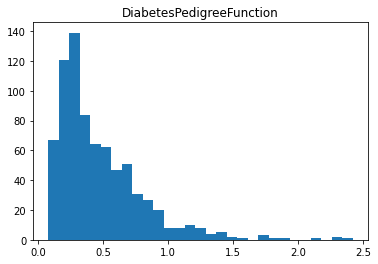

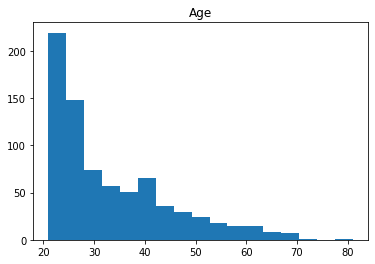

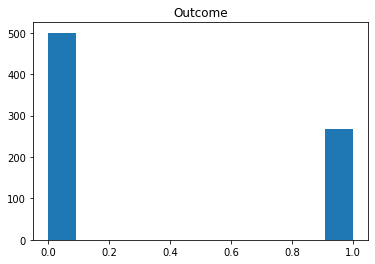

In [27]:
# Plotting histograms
'''
From BB
'''

plt.hist(diabetes['Pregnancies'], bins='auto')
plt.title('Pregnancies')
plt.show()

plt.hist(diabetes['Glucose'], bins='auto')
plt.title('Glucose')
plt.show()

plt.hist(diabetes['BloodPressure'], bins='auto')
plt.title('BloodPressure')
plt.show()

plt.hist(diabetes['SkinThickness'], bins='auto')
plt.title('SkinThickness')
plt.show()

plt.hist(diabetes['Insulin'], bins='auto')
plt.title('Insulin')
plt.show()

plt.hist(diabetes['BMI'], bins='auto')
plt.title('BMI')
plt.show()

plt.hist(diabetes['DiabetesPedigreeFunction'], bins='auto')
plt.title('DiabetesPedigreeFunction')
plt.show()

plt.hist(diabetes['Age'], bins='auto')
plt.title('Age')
plt.show()

plt.hist(diabetes['Outcome'], bins='auto')
plt.title('Outcome')
plt.show()


Text(0, 0.5, 'Insulin')

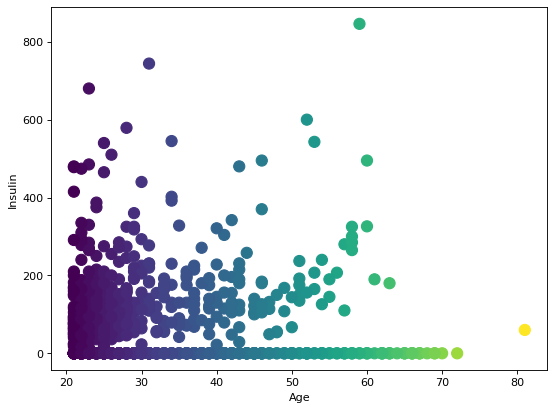

In [28]:
# Bubble plot 

'''
From BB
'''

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(diabetes['Age'], diabetes['Insulin'], c=diabetes['Age'], s=100)
plt.xlabel('Age')
plt.ylabel('Insulin')


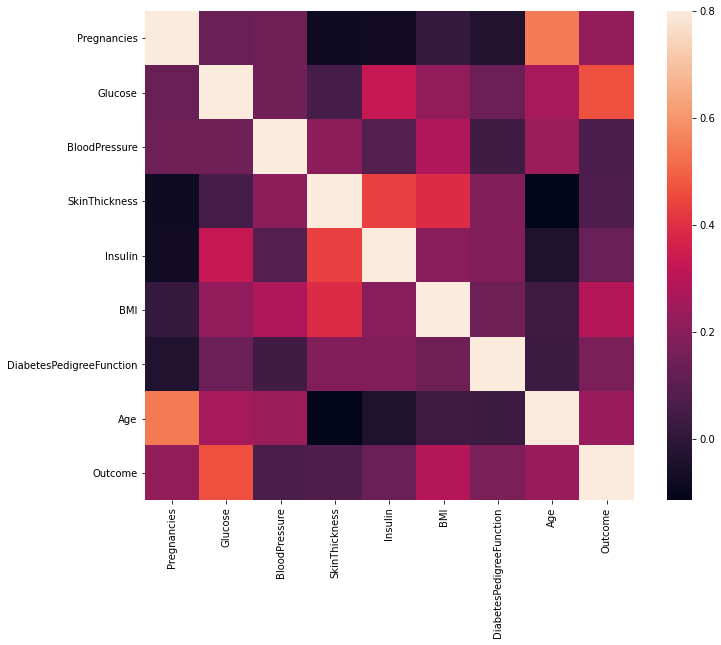

In [29]:
# Correlation matrix
'''
From NN
'''

corr_mat = diabetes.corr()
fig = plt.figure(figsize= (12,9))

sns.heatmap(corr_mat, vmax=.8, square = True)
plt.show()


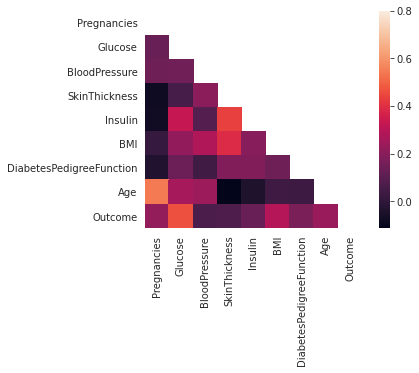

In [30]:
# Correlation matrix
'''
From BB
'''

corr_mat = diabetes.corr()
#mask to eliminate flipped data
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True)


### Diabetes Dataset 2 Visualizations

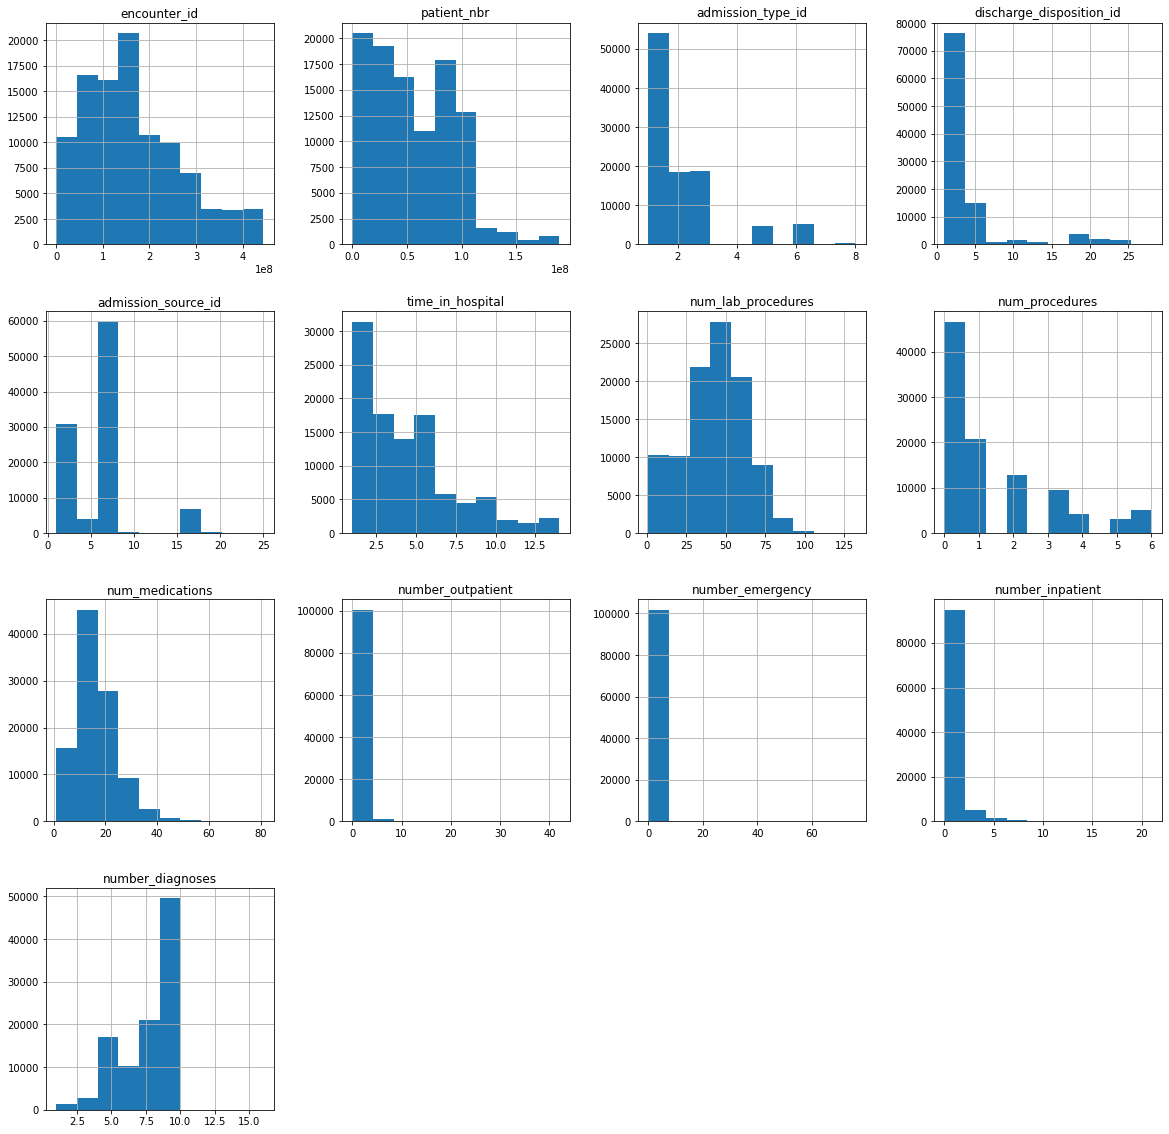

In [31]:
# Plot histograms of features

diabetes2.hist(figsize= (20,20))
plt.show()


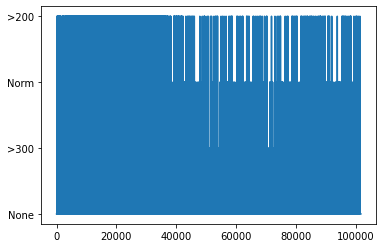

In [32]:
# Simple plots to examine data
# max_glu_serum  
plt.plot(diabetes2['max_glu_serum']);


**Data will need to be clean**


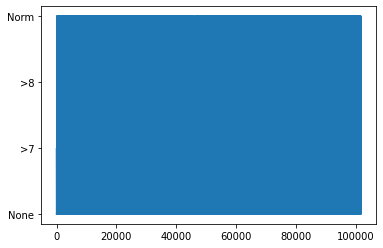

In [33]:
# Simple plots to examine data
# A1Cresult  
plt.plot(diabetes2['A1Cresult']);


**Data will need to be clean**

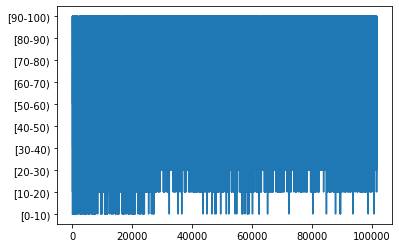

In [34]:
# Simple plots to examine data
# age 
plt.plot(diabetes2['age']);


**Data will need to be clean**


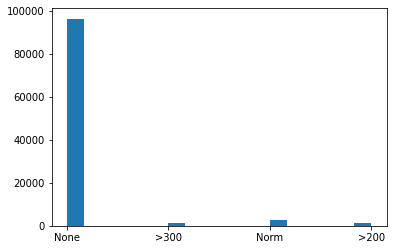

In [35]:
# Plotting histogram 
# max_glu_serum 
plt.hist(diabetes2['max_glu_serum'], bins='auto')
plt.show()


**Data will need to be clean by removing "None" values**
**Feature max_glu_serum might be helpful for correlation**


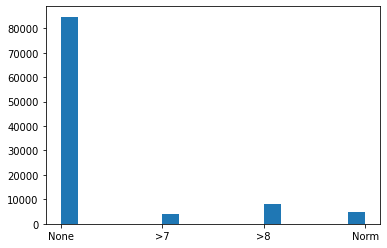

In [36]:
# Plotting histogram 
# A1Cresult  
plt.hist(diabetes2['A1Cresult'], bins='auto')
plt.show()


**Data will need to be clean, by removing "None" values**
**Feature A1Cresult might be helpful for correlation**


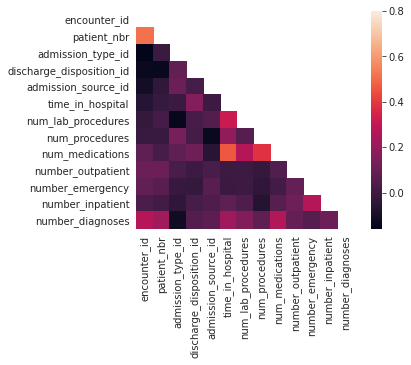

In [37]:
# Correlation matrix
'''
From BB

'''

corr_mat = diabetes2.corr()
#mask to eliminate flipped data
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True)


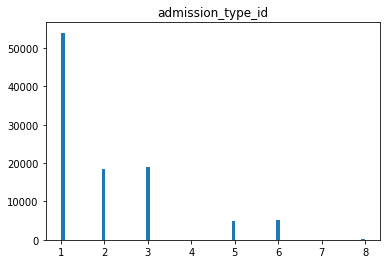

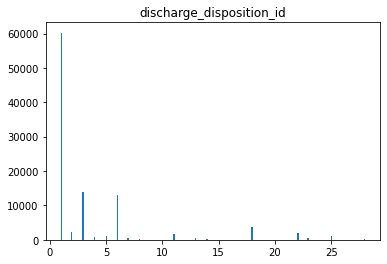

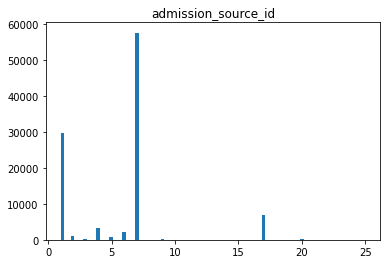

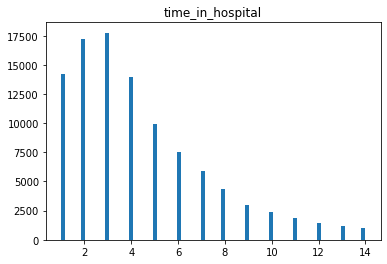

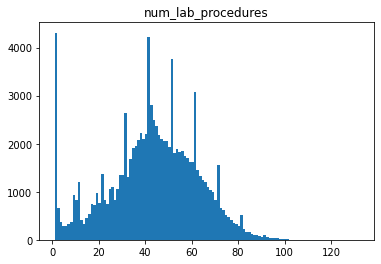

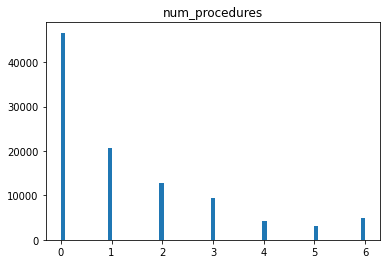

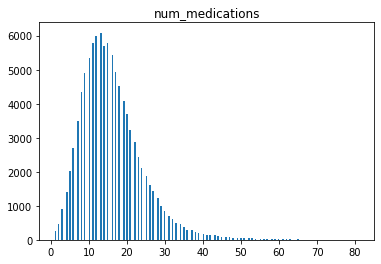

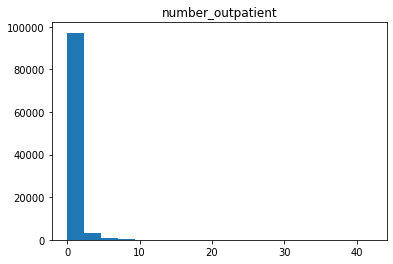

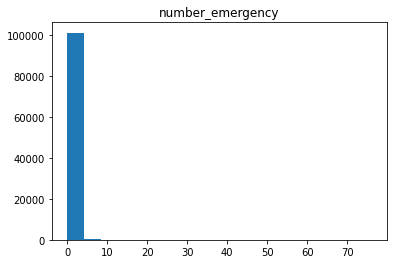

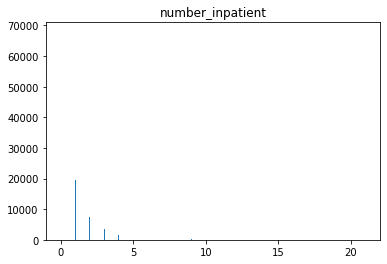

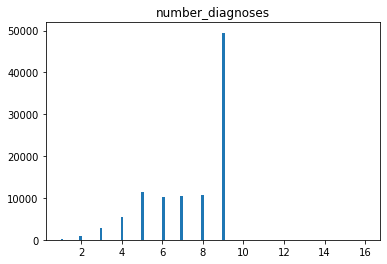

In [38]:
# Plotting histograms

'''
From BB
'''

plt.hist(diabetes2['admission_type_id'], bins='auto')
plt.title('admission_type_id')
plt.show()

plt.hist(diabetes2['discharge_disposition_id'], bins='auto')
plt.title('discharge_disposition_id')
plt.show()

plt.hist(diabetes2['admission_source_id'], bins='auto')
plt.title('admission_source_id')
plt.show()

plt.hist(diabetes2['time_in_hospital'], bins='auto')
plt.title('time_in_hospital')
plt.show()

plt.hist(diabetes2['num_lab_procedures'], bins='auto')
plt.title('num_lab_procedures')
plt.show()

plt.hist(diabetes2['num_procedures'], bins='auto')
plt.title('num_procedures')
plt.show()

plt.hist(diabetes2['num_medications'], bins='auto')
plt.title('num_medications')
plt.show()

plt.hist(diabetes2['number_outpatient'], bins='auto')
plt.title('number_outpatient')
plt.show()

plt.hist(diabetes2['number_emergency'], bins='auto')
plt.title('number_emergency')
plt.show()

plt.hist(diabetes2['number_inpatient'], bins='auto')
plt.title('number_inpatient')
plt.show()

plt.hist(diabetes2['number_diagnoses'], bins='auto')
plt.title('number_diagnoses')
plt.show()


**Investigate feature "time_in_hosptal" further**


## Data Cleaning

### Diabetes Dataset 1 Cleaning


In [39]:
# Data Cleaning
'''
PS
'''


'\nPS\n'

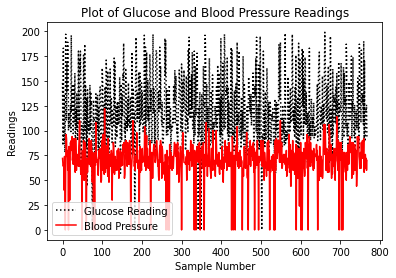

In [40]:
# Review Plot to Clean: Glucose Reading and Blood Pressure

plt.plot(diabetes['Glucose'], ':k', label='Glucose Reading')
plt.plot(diabetes['BloodPressure'], '-r', label='Blood Pressure')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and Blood Pressure Readings')
plt.legend();


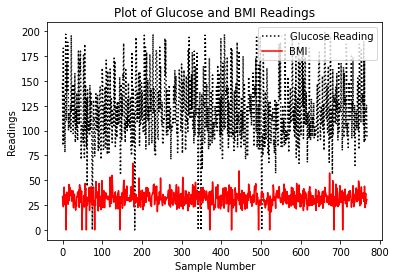

In [41]:
# Review Plot to Clean: BMI and Glucose

plt.plot(diabetes['Glucose'], ':k', label='Glucose Reading')
plt.plot(diabetes['BMI'], '-r', label='BMI')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and BMI Readings')
plt.legend();


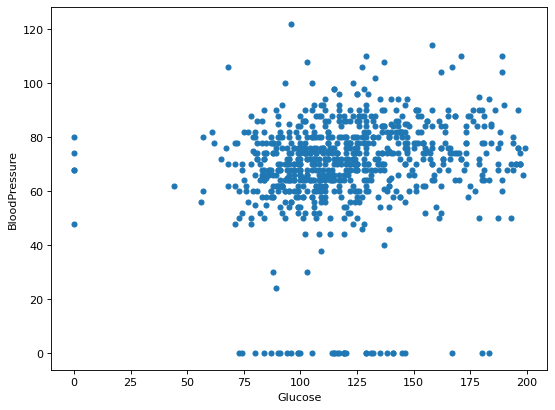

In [42]:
# Review Plot to Clean: 
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(diabetes['Glucose'], diabetes['BloodPressure'], s=20)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure');


In [43]:
# Removing zero values from BMI, Glucose, and BloodPressure
# Age has no zero's; Pregnancy is not needed to remove, since that just means zero prior pregnancies; DiabetesPedigreeFunction has no zeros

df0 = diabetes.query('BMI != 0 & Glucose !=0 & BloodPressure != 0')


In [44]:
# Show how many records and fields
df0.shape

(724, 9)

In [45]:
# Removing the zeros from Insulin column would reduce the dataset from 724 to 392; therefore, creating other dataframe to take that into account

df0_noZeroInsulin = diabetes.query('BMI != 0 & Glucose !=0 & BloodPressure != 0 & Insulin != 0')


In [46]:
# Show how many records and fields with the field Insulin removed
df0_noZeroInsulin.shape


(392, 9)

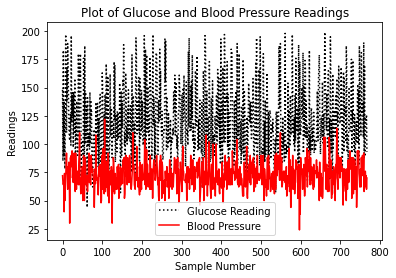

In [47]:
# Clean Plot: Glucose Reading and Blood Pressure

plt.plot(df0['Glucose'], ':k', label='Glucose Reading')
plt.plot(df0['BloodPressure'], '-r', label='Blood Pressure')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and Blood Pressure Readings')
plt.legend();

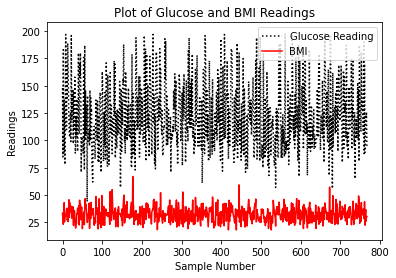

In [48]:
# Clean Plot: Glucose Reading and BMI

plt.plot(df0['Glucose'], ':k', label='Glucose Reading')
plt.plot(df0['BMI'], '-r', label='BMI')
plt.xlabel('Sample Number')
plt.ylabel('Readings')
plt.title('Plot of Glucose and BMI Readings')
plt.legend();


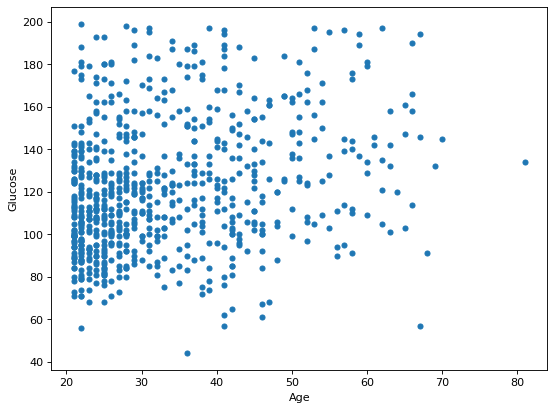

In [49]:
# Clean Plot: Age and Glucose Scatter Plot
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df0['Age'], df0['Glucose'], s=20)
plt.xlabel('Age')
plt.ylabel('Glucose');


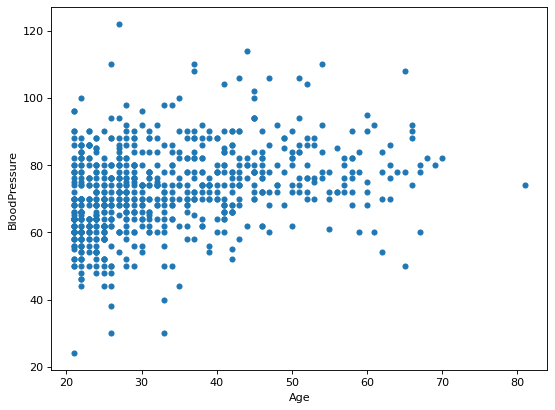

In [50]:
# Clean Plot: Age and BloodPressure Scatter Plot

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df0['Age'], df0['BloodPressure'], s=20)
plt.xlabel('Age')
plt.ylabel('BloodPressure');

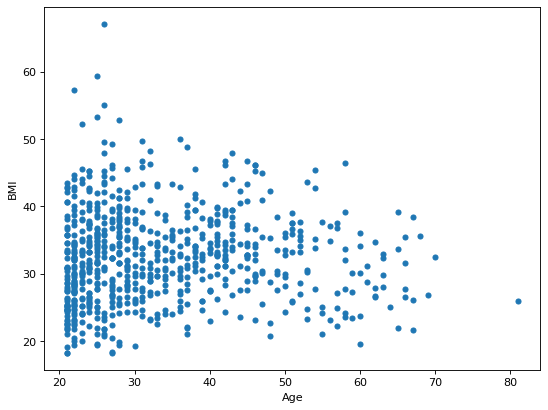

In [51]:
# # Clean Plot: Age and BMI Scatter Plot

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(df0['Age'], df0['BMI'], s=20)
plt.xlabel('Age')
plt.ylabel('BMI');

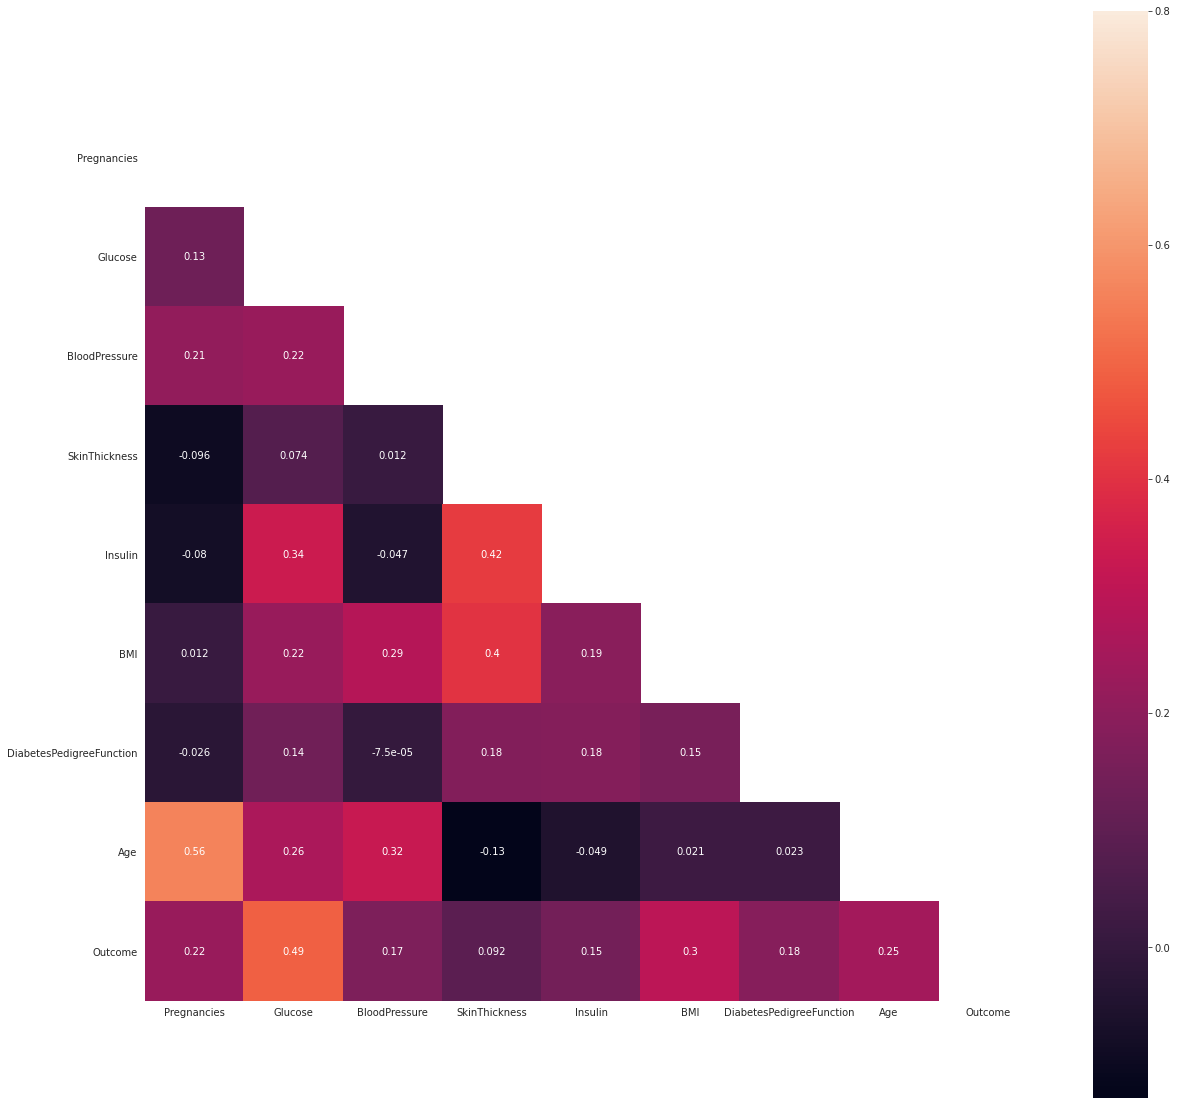

In [52]:
# Heat Map with the zeros removed

corr_mat = df0.corr()
plt.figure(figsize=(20,20))
#mask to eliminate flipped data
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.8, annot=True, square=True)

In [53]:
# Find out how many records show a Glucose > 135, Blood Pressure > 80, BMI > 25, Outcome = 1

# Determine the positive cases for diabetes
diab_pos = diabetes[diabetes['Outcome']==1]
print(f'Positive Prima cases: {len(diab_pos)}')

# Determine the records with Glucose > 135
gluG100 = diabetes[diabetes['Glucose']>135]
print(f'Cases where Glucose is greater than 135: {len(gluG100)}')

# Determine the records with Blood Pressure > 80
bloodP = diabetes[diabetes['BloodPressure']>80]
print(f'Cases where Blood Pressure is greater than 80: {len(bloodP)}')

# Determine the records with BMI > 25
bmi1 = diabetes[diabetes['BMI']>25]
print(f'Cases where BMI is greater than 25: {len(bmi1)}')


Positive Prima cases: 268
Cases where Glucose is greater than 135: 226
Cases where Blood Pressure is greater than 80: 165
Cases where BMI is greater than 25: 645


####**Systolic BP (top value) mm Hg**
Low Blood Pressure: 0-80

Normal Blood Pressure: 80-110

Pre-High Blood Pressure: 110-130

High Blood Pressure: 130-170
<br/>
<br/>
####**Diastolic BP (bottom value) mm Hg**
Low Blood Pressure: 0-60

Normal Blood Pressure: 60-80

Pre-High Blood Pressure: 80-90

High Blood Pressure: 90-100

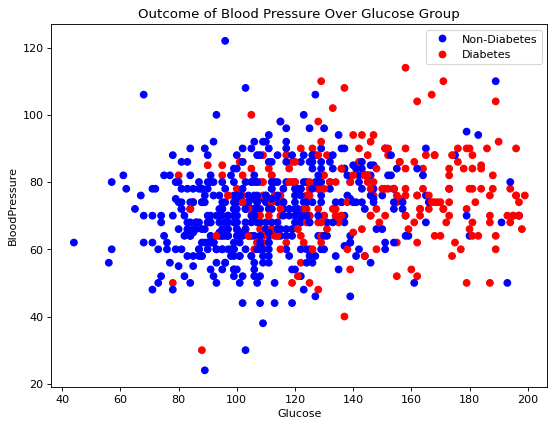

In [54]:
# Clean Plot: Glucose and Blood Pressure Scatter Plot
# Cluster around 100-130 for the glucose and a Blood Pressure of 60-80
# Glucose of 100-130 thru out the day is pretty stable & a diastolic blood pressure of 60-80 is normal
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
scatter = plt.scatter(df0['Glucose'], df0['BloodPressure'], c=df0['Outcome'], cmap=plt.cm.bwr) 
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Outcome of Blood Pressure Over Glucose Group')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Diabetes', 'Diabetes']);

####**BMI Levels for Women**

Underwieght: < 18.5

Normal: 18.5 - 24.5

Overweight: 25 - 29.9

Obese: 30 - 34.9

Extremly Obese: > 35

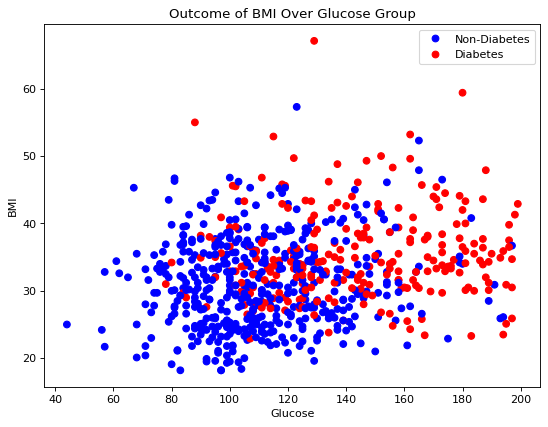

In [55]:
# Clean Plot: Glucose and BMI Scatter Plot
# Cluster around 100-130 for the glucose and BMI 25-35
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
scatter = plt.scatter(df0['Glucose'], df0['BMI'], c=df0['Outcome'], cmap=plt.cm.bwr) 
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Outcome of BMI Over Glucose Group')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Diabetes', 'Diabetes']);

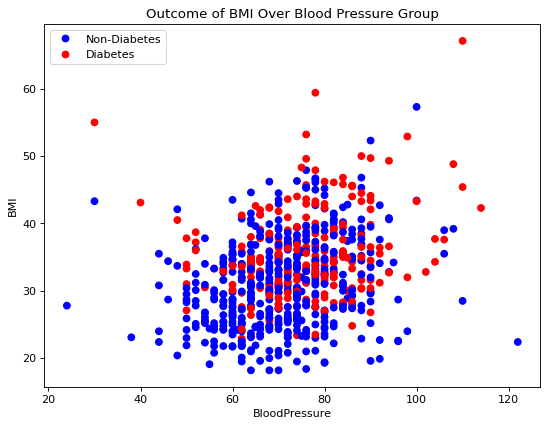

In [56]:
# Clean Plot: Blood Pressure and BMI Scatter Plot
# Cluster around 60-80 for the Blood Pressure and BMI 25-35
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
scatter = plt.scatter(df0['BloodPressure'], df0['BMI'], c=df0['Outcome'], cmap=plt.cm.bwr) 
plt.xlabel('BloodPressure')
plt.ylabel('BMI')
plt.title('Outcome of BMI Over Blood Pressure Group')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Diabetes', 'Diabetes']);

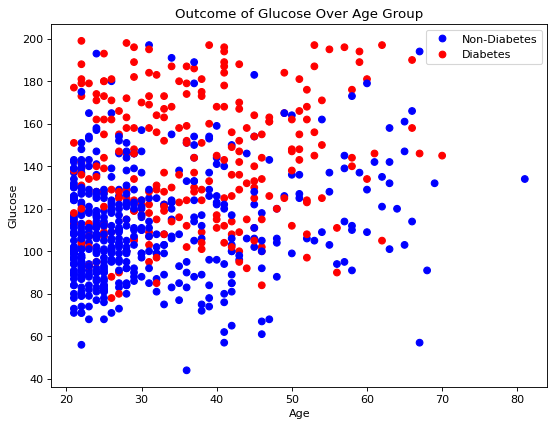

In [57]:
# Clean Plot: Age and Glucose Scatter Plot
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
scatter = plt.scatter(df0['Age'], df0['Glucose'], c=df0['Outcome'], cmap=plt.cm.bwr) 
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Outcome of Glucose Over Age Group')
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Diabetes', 'Diabetes']);


####**A1C and Glucose Reference**

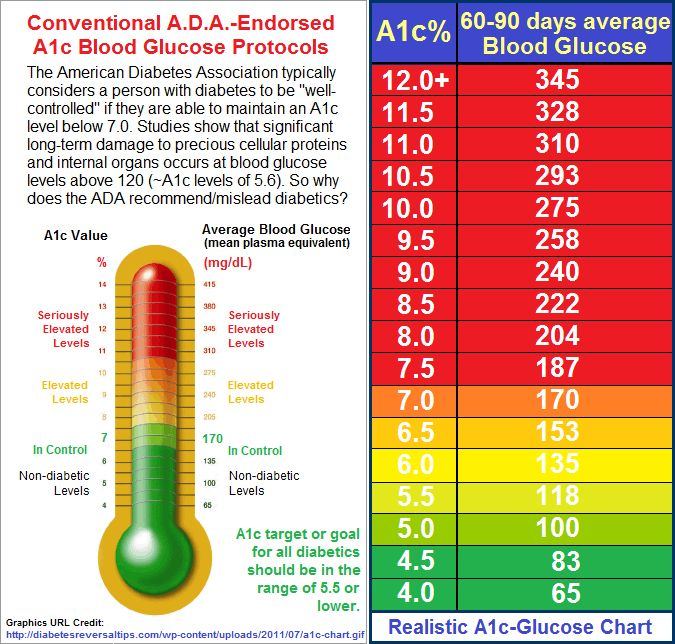



**Source: diabetesreversaltips.com**

### Diabetes Dataset 2 Cleaning


In [58]:
# Review of data
diabetes2.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [59]:
# Records and fields of dataset2
diabetes2.shape

(101766, 50)

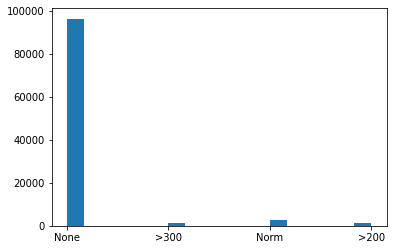

In [60]:
# Review of histogram for field of interest: max_glu_serum 
plt.hist(diabetes2['max_glu_serum'], bins='auto')
plt.show()

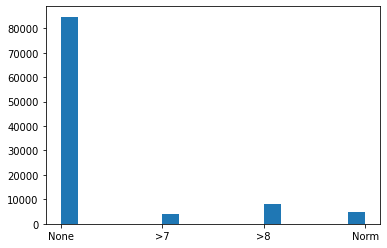

In [61]:
# Review of histogram for field of interest: A1Cresult  
plt.hist(diabetes2['A1Cresult'], bins='auto')
plt.show()

In [62]:
# Remove "None" records for max_glu_serum field
# Separate dataframe in order to not reduce dataset2 too much
df0_glu = diabetes2.query('max_glu_serum != "None"')
df0_glu.shape


(5346, 50)

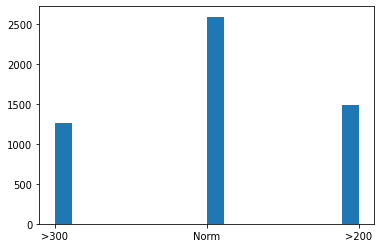

In [ ]:
# Clean Histogram: max_glu_serum 
plt.hist(df0_glu['max_glu_serum'], bins='auto')
plt.show()

In [63]:
# Remove "None" records for A1Cresult field
# Separate dataframe in order to not reduce dataset2 too much
df0_A1C = diabetes2.query('A1Cresult != "None"')
df0_A1C.shape


(17018, 50)

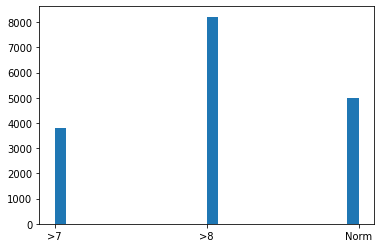

In [64]:
# Clean Histogram: A1Cresult 
plt.hist(df0_A1C['A1Cresult'], bins='auto')
plt.show()


## Feature Engineering

In [65]:
# Feature Engineering
'''
FOR FUTURE DEVELOPMENT

'''


'\nFOR FUTURE DEVELOPMENT\n\n'

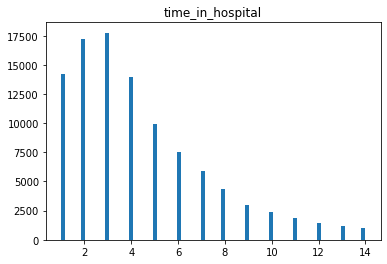

In [66]:
# An interesting field (time_in_hospital)
plt.hist(diabetes2['time_in_hospital'], bins='auto')
plt.title('time_in_hospital')
plt.show()


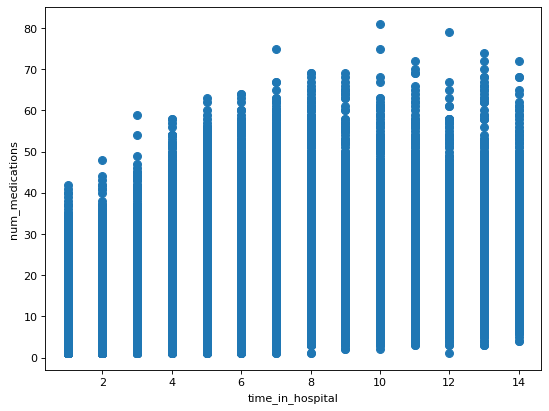

In [67]:
# An interesting field for time_in_hospital and comparison to num_medications
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(diabetes2['time_in_hospital'], diabetes2['num_medications'], s=50)
plt.xlabel('time_in_hospital')
plt.ylabel('num_medications');

## Model Selection


In [1]:
'''
NN code for Model Selection

'''

'\nNN code for Model Selection\n\n'

In [68]:
# get the features in a list
cols = (diabetes.columns).to_list()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [69]:
## create correlation matrix with coefficients
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(diabetes[cols].iloc[:,range(0,len(cols))].values)

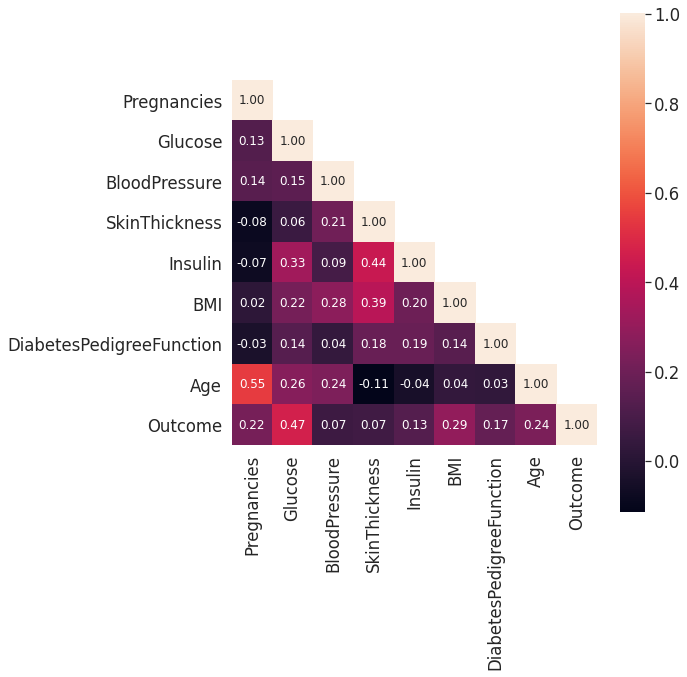

In [70]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)

#mask to eliminate flipped data
mask = np.zeros_like(cov_mat)
mask[np.triu_indices_from(mask)] = True
np.fill_diagonal(mask, 0.0)

with sns.axes_style("white"):
    hm = sns.heatmap(cov_mat,
                     mask=mask,
                     cbar=True,
                     annot=True,
                     square=True,
                     fmt='.2f',
                     annot_kws={'size': 12},
                     yticklabels=cols,
                     xticklabels=cols)
plt.tight_layout()
plt.show()

In [71]:
# select features with coeff > 0.20 + Blood Pressure
cols_selected = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure']#, 'DiabetesPedigreeFunction']

In [72]:
## split the data (train - test)
from sklearn.model_selection import train_test_split

X = diabetes[cols_selected].iloc[:,0:6].values     
y = diabetes['Outcome']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

In [73]:
## Normalize inputs ##

means= np.mean(X_train, axis=0)
stds= np.std(X_train, axis=0)

# check values
print(means)
print(stds)

X_train= (X_train - means)/stds
X_test= (X_test - means)/stds

print(X_train.shape)
print(X_test.shape)

[120.89576547  32.20667752  33.59446254   3.87459283  69.22638436]
[31.78381087  7.90782841 12.00637868  3.44083157 19.53496542]
(614, 5)
(154, 5)


In [74]:
#############################################
## PRINCIPAL BINARY CLASSIFICATION ALGORITHMS
#############################################
## 1. Logistic Regression
## 2. KNearest Neighbors
## 3. Decision Trees
## 4. Support Vector Machine (SVM)
#############################################

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import ensemble

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [76]:
# 1. define classifiers 

classifiers = {
    'Logistic Regression': LogisticRegression(),
    
    'KNearest Neighbors': KNeighborsClassifier(),    
    
    'Decision Trees': DecisionTreeClassifier(min_samples_leaf=6, max_depth=5),
    
    'Support Vector Machine (SVM)': svm.SVC(kernel='linear', C=0.01), #kernel='sigmoid','rbf') #kernel='linear', C=0.01
    
    'Gradient Boosting': ensemble.GradientBoostingRegressor(n_estimators= 500,
          max_depth= 4,
          min_samples_split= 5,
          learning_rate= 0.01,
          loss= 'ls')
}

In [77]:
# Used to save the results
results=dict()

Logistic Regression: Errors= 28
Accuracy Score= 
0.8181818181818182
Confussion  Matrix: 
[[98 19]
 [ 9 28]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       117
           1       0.60      0.76      0.67        37

    accuracy                           0.82       154
   macro avg       0.76      0.80      0.77       154
weighted avg       0.84      0.82      0.82       154

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Acc Model Logistic Regression= 81.82 %
-------------------------------------------------------------
KNearest Neighbors: Errors= 29
Accuracy Score= 
0.8116883116883117
Confussion  Matrix: 
[[94 16]
 [13 31]]
Classi

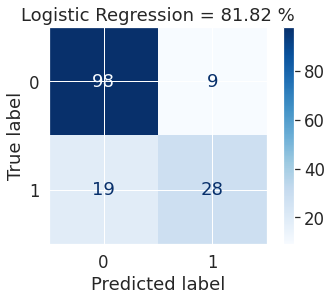

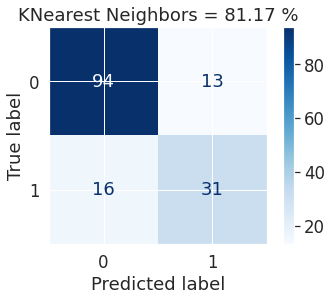

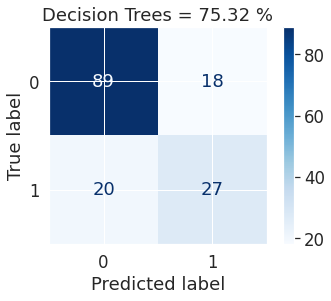

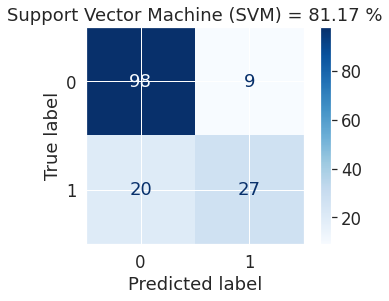

In [78]:
# 2. Train model and make predictions

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag the outliers
    if clf_name == 'Logistic Regression':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'KNearest Neighbors':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Decision Trees':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Support Vector Machine (SVM)':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    elif clf_name == 'Gradient Boosting':
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
    #calculate number of errors
    n_errors = (y_pred != y_test).sum()
    
    #run classification metrics
    print(f'{clf_name}: Errors= {n_errors}')
    print('Accuracy Score= ')
    print(clf.score(X_test, y_test))
    # save results
    results[clf_name]= round(clf.score(X_test, y_test)*100, 2)
    if clf_name == 'Gradient Boosting':
        continue
    else:
        print('Confussion  Matrix: ')
        print(confusion_matrix(y_pred, y_test))
        print('Classification Report: ')
        print(classification_report(y_pred, y_test))
    
    print(classification_report(y_test, y_pred))
    
    # plot confusion matrix -(redicted labels and true labels)
    plot = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
    plot.ax_.set_title(clf_name + f' = { round(clf.score(X_test, y_test)*100, 2)} %')
    
    print(f"Acc Model {clf_name}= {round(clf.score(X_test, y_test)*100, 2)} %")
    
    print('-------------------------------------------------------------')

In [79]:
# Resume Model and Accuracy Porcentage results
results

{'Decision Trees': 75.32,
 'Gradient Boosting': 32.59,
 'KNearest Neighbors': 81.17,
 'Logistic Regression': 81.82,
 'Support Vector Machine (SVM)': 81.17}

In [80]:
## Best Model Logistic Regression ##

Text(0.5, 0, 'Importance')

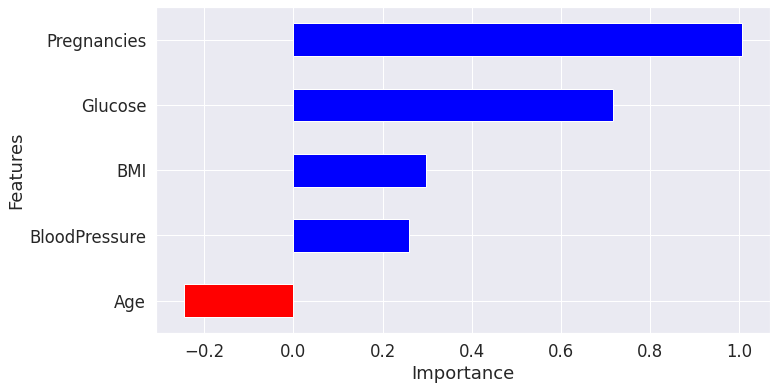

In [81]:
# Show importance of each features variable used in the Logistic Rregression Model created

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = clf.predict(X_test)

coeff = list(log_reg.coef_[0])
labels = list(diabetes.drop(['Outcome', 'SkinThickness', 'Insulin','DiabetesPedigreeFunction'],1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [82]:
####################
## Saving the model 
####################

In [83]:
import sklearn.externals
import joblib

joblib.dump([log_reg, means, stds], 'diab_log_reg_model_5features.pkl')

['diab_log_reg_model_5features.pkl']

In [84]:
####################
## Load the model 
####################

log_reg_model, means, stds = joblib.load('diab_log_reg_model_5features.pkl')

# calculate accurancy score (should be the same)
acc_model = log_reg_model.score(X_test, y_test)
print(f"acc model loaded= {round(acc_model*100, 2)} %")

acc model loaded= 81.82 %


In [85]:
#####################################
## Make a prediction with loaded model
#####################################
# if sample is not normalizalized (sample-means) / stds
X_value = X_test[:1]
X_value

array([[ 2.45735903,  1.35224513, -0.96569189, -0.8354355 ,  0.34674316]])

In [86]:
# prediction
pred = log_reg_model.predict(X_value)
pred

array([1])

In [87]:
# prediction vs real value
pred == y_test[:1]

661    True
Name: Outcome, dtype: bool

In [88]:
print(pred)
print(y_test[:1].values)

[1]
[1]


In [90]:
## test prediction model with a set sample
# cerate a set of data with the first 22 rows from the dataset
sample_set = X_test[:23]
sample_set.shape

(23, 5)

In [91]:
# make a prediction with the set defined
pred_set = log_reg_model.predict(sample_set)
pred_set

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0])

In [92]:
# Check the accuracy for the model prediction with the set defined
acc_model_set = log_reg_model.score(X_test[:23], y_test[:23])
print(f"acc model set= {acc_model_set*100} %")

acc model set= 95.65217391304348 %
